# LUNG CANCER DETECTION PROJECT

* About the Dataset

The dataset used for this project is the Lung Cancer Detection Dataset, which is collected from the https://www.kaggle.com/datasets/jillanisofttech/lung-cancer-detection 

* Total no. of attributes:16 
* No .of instances:284 
* Attribute information: 
1. Gender: M(male), F(female)
2. Age: Age of the patient 
3. Smoking: YES=2, NO=1. 
4. Yellow fingers: YES=2 ,NO=1. 
5. Anxiety: YES=2, NO=1. 
6. Peer_pressure: YES=2, NO=1
7. Chronic Disease: YES=2, NO=1. 
8. Fatigue: YES=2 , NO=1
9. Allergy: YES=2, NO=1.
10. Wheezing: YES=2, NO=1. 
11. Alcohol: YES=2, NO=1. 
12. Coughing: YES=2, NO=1. 
13. Shortness of Breath: YES=2,NO=1. 
14. Swallowing Difficulty: YES=2, NO=1. 
15. Chest pain: YES=2, NO=1. 
16. Lung Cancer: YES, NO.

## Importing Libraries

In [168]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

* Loading Dataset

In [169]:
df = pd.read_csv("./survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


## Getting Insights of Dataset

In [170]:
df.shape

(309, 16)

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [172]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [173]:
print(df.isna().sum())
print(df.duplicated().sum())

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64
33


* There are no missing values in the data, but there are 33 duplicate values. Let's remove them

In [174]:
df.drop_duplicates(inplace=True)

In [175]:
df.duplicated().sum()

0

* Replace the Categorical Values to the numeric values

In [176]:
df["GENDER"] = df["GENDER"].replace(["M","F"],[0,1])
df["LUNG_CANCER"] = df["LUNG_CANCER"].replace(["YES","NO"],[1,0])

In [ ]:
df.head(10)

: 

## VISULAIZATION OF DATASET

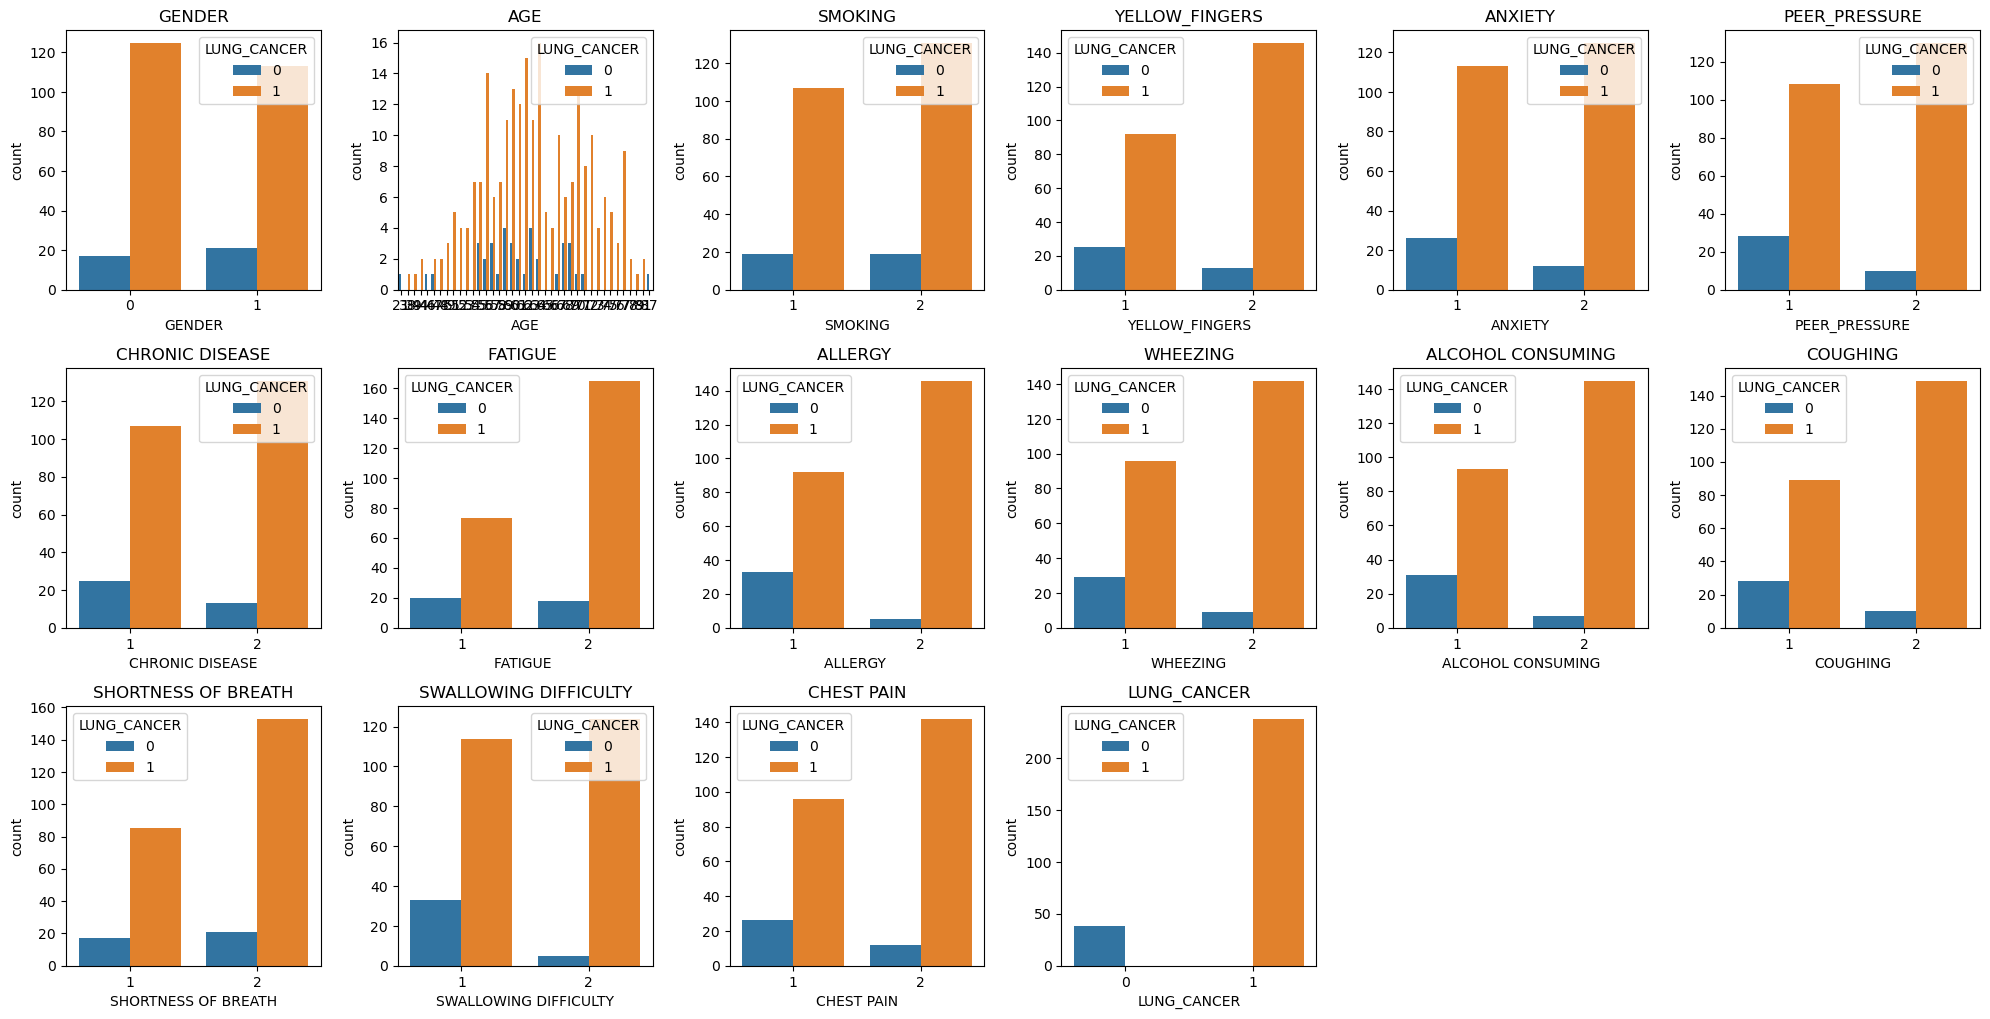

In [178]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(6,6,i+1)
    plt.title(list[i])
    sns.countplot(data=df,x=list[i],hue="LUNG_CANCER")
plt.tight_layout()

* Conclusions:

* The graphs shows the number of data points for each column as it is a count plot.
* The graphs shows that people with gender Male have more chance of having lung cancer.
* The graphs shows that people with age between 40 to 60 years have more chance of having lung cancer.
* The graphs shows that people with smoking YES have more chance of having lung cancer.
* The graphs shows that people with yellow fingers NO have more chance of having lung cancer.
* The graphs shows that people with anxiety NO have more chance of having lung cancer.
* The graphs shows that people with peer pressure NO have more chance of having lung cancer.
* The graphs shows that people with chronic disease NO have more chance of having lung cancer.

<Axes: xlabel='AGE', ylabel='Density'>

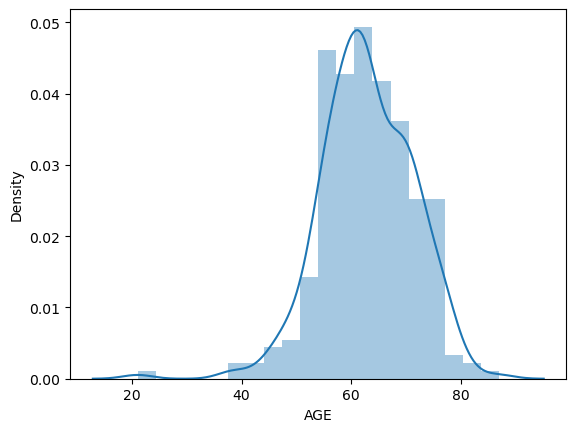

In [179]:
sns.distplot(df['AGE'])

* The graphs shows that peoples with age between 50 to 75 years have more chance of having lung cancer

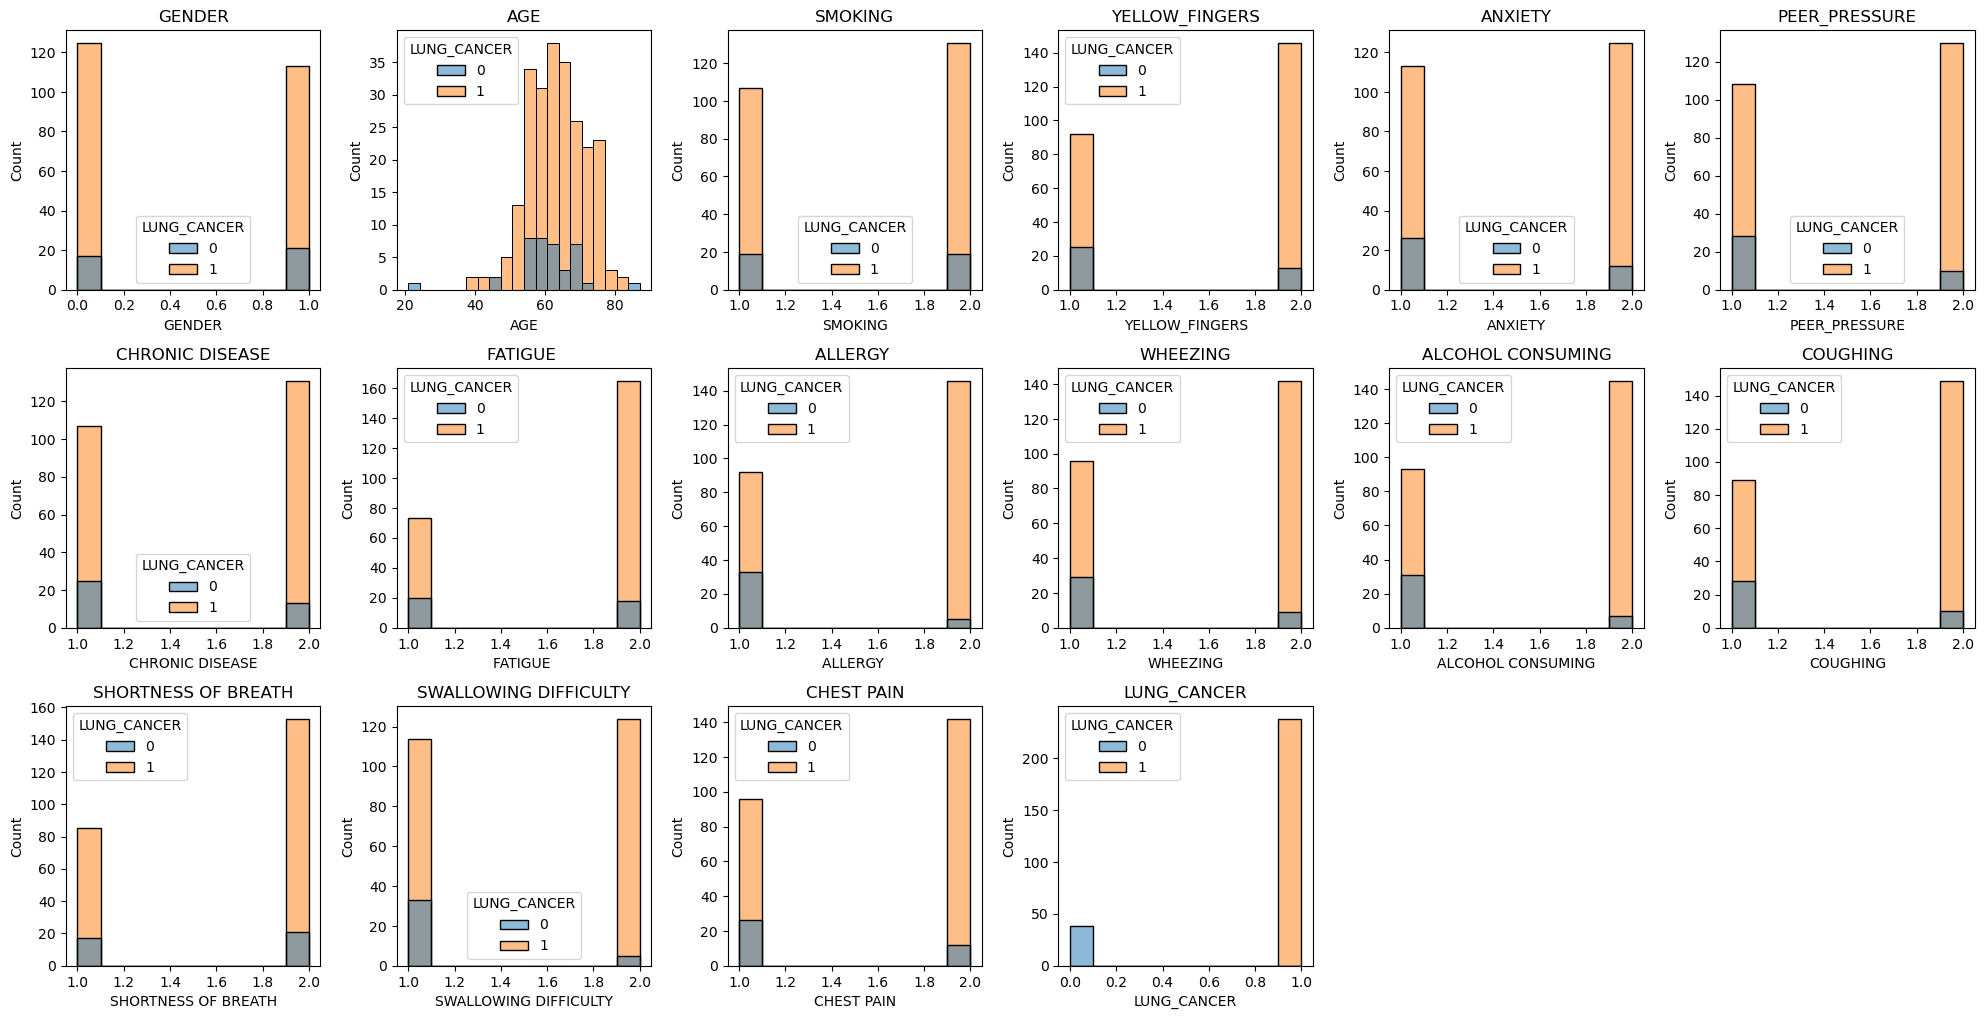

In [180]:
list=df.columns.tolist()
plt.figure(figsize=(20,20))
for i in range(len(list)):
    plt.subplot(6,6,i+1)
    plt.title(list[i])
    sns.histplot(data=df,x=list[i],hue="LUNG_CANCER")
plt.tight_layout()

* Conclusions

* The graphs shows the distribution of data points for each column as it is a histogram plot.
* The graphs shows that people with age between 50 to 75 years have more chance of having lung cancer.
* The graphs shows that people with gender Male have more chance of having lung cancer.
* The graphs shows that people with smoking YES have more chance of having lung cancer.
* The graphs shows that people with yellow fingers NO have more chance of having lung cancer.

# Implementing Machine Learning Algorithms for Classifications

### Pre-processing Data for model training

* Storing target colums in Y and independent variables in X

In [181]:
index_to_exclude = df.columns.get_loc('LUNG_CANCER')
X = df.iloc[:, [i for i in range(df.shape[1]) if i != index_to_exclude]].values
y = df.iloc[:,index_to_exclude].values

* Spliting the X and y for training and testing in 80 to 20 ratio

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

* Training Random Forect Classifier

In [183]:
RF_model = RandomForestClassifier(n_estimators= 150)
RF_model.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150)

In [184]:
RF_model.score(X_train , y_train)

1.0

In [185]:
RF_pred = RF_model.predict(X_test)
rf=accuracy_score(y_test , RF_pred)
rf

0.875

In [186]:
print(classification_report(y_test , RF_pred))

              precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.86      1.00      0.93        44

    accuracy                           0.88        56
   macro avg       0.93      0.71      0.76        56
weighted avg       0.89      0.88      0.85        56



* Training Support Vector Classifier

In [187]:
svc = svm.SVC(kernel='linear', gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [188]:
svc.score(X_train , y_train)

0.9318181818181818

In [189]:
svc_pred = svc.predict(X_test)
svc=accuracy_score(y_test , svc_pred)
svc

0.9285714285714286

In [190]:
print(classification_report(y_test , svc_pred))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80        12
           1       0.92      1.00      0.96        44

    accuracy                           0.93        56
   macro avg       0.96      0.83      0.88        56
weighted avg       0.93      0.93      0.92        56



* Training Decision Tree Classifier

In [191]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [192]:
dt.score(X_train , y_train)

1.0

In [193]:
dt_pred = dt.predict(X_test)
DT_acc=accuracy_score(y_test , dt_pred)
DT_acc

0.9107142857142857

In [194]:
print(classification_report(y_test , dt_pred))

              precision    recall  f1-score   support

           0       0.89      0.67      0.76        12
           1       0.91      0.98      0.95        44

    accuracy                           0.91        56
   macro avg       0.90      0.82      0.85        56
weighted avg       0.91      0.91      0.91        56



* Creating DataFrame of Models and their scores

In [195]:
models=pd.DataFrame({
    'models':['Random_forest','SVC','Decsion_Treee'],
    'scores':[rf,svc,DT_acc]})
models

,models,scores
0,Random_forest,0.875000
1,SVC,0.928571
2,Decsion_Treee,0.910714


* Ploting the DataFrame of models

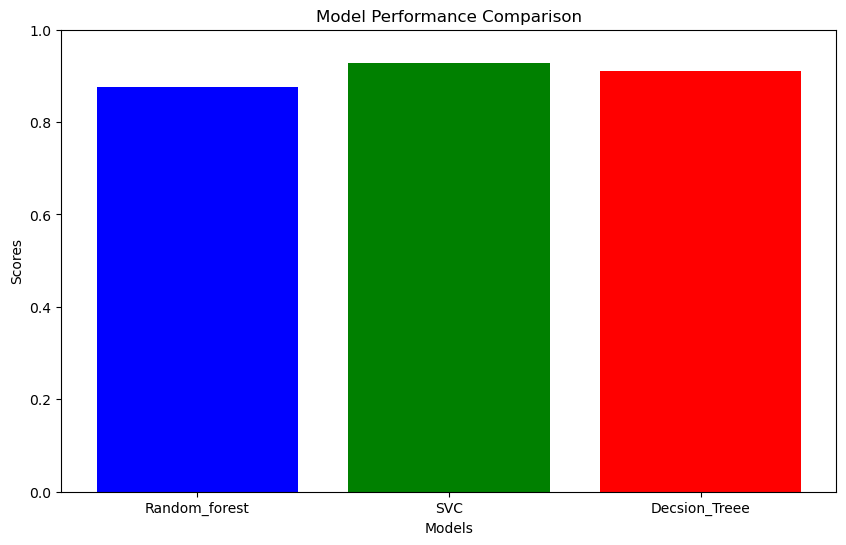

In [196]:
# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models['models'], models['scores'], color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Ensuring the y-axis goes from 0 to 1
plt.show()

# Implemenitng Deep Learning Algorithms for Classification

### Trying Classical Neural Networks method

* Standardizing the X and y

In [212]:
# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

* Building a model with 4 hidden layers hac=ving 128, 64, 32 and 1 neurons repectively
* Using ReLU as activation function having dropout 0.5 means it drops the less informative features
* Batch normalization normalizes the input of each layer to have a mean of zero and a variance of one, across the batch dimension.

In [213]:
# Define the model
model = Sequential([
    Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.6),
    Dense(64, activation='relu'), 
    BatchNormalization(),
    Dropout(0.6),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

* Using Adam as the optimizer and binary crossentropy as the loss function with accuracy as the evaluation metric.
* Early Stoping wait for 20 epochs and then it will terminate the training process with resoting best weights of the model

In [214]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0002), loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [215]:
# Train the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=32, callbacks=[early_stopping])

Epoch 1/100
6/6 [==============================] - 1s 37ms/step - loss: 0.6049 - accuracy: 0.7273 - val_loss: 0.5854 - val_accuracy: 0.9091
Epoch 2/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5873 - accuracy: 0.7159 - val_loss: 0.5901 - val_accuracy: 0.9091
Epoch 3/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5215 - accuracy: 0.7386 - val_loss: 0.5949 - val_accuracy: 0.8636
Epoch 4/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5674 - accuracy: 0.7386 - val_loss: 0.5974 - val_accuracy: 0.8636
Epoch 5/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5131 - accuracy: 0.7500 - val_loss: 0.5989 - val_accuracy: 0.8182
Epoch 6/100
6/6 [==============================] - 0s 8ms/step - loss: 0.5030 - accuracy: 0.7443 - val_loss: 0.5994 - val_accuracy: 0.8182
Epoch 7/100
6/6 [==============================] - 0s 8ms/step - loss: 0.4882 - accuracy: 0.7614 - val_loss: 0.5984 - val_accuracy: 0.8182
Epoch 8/100
6/6 [=========

* checking the accuracy of the model

In [216]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

2/2 [==============================] - 0s 6ms/step - loss: 0.3119 - accuracy: 0.9107
Test Accuracy: 91.07%


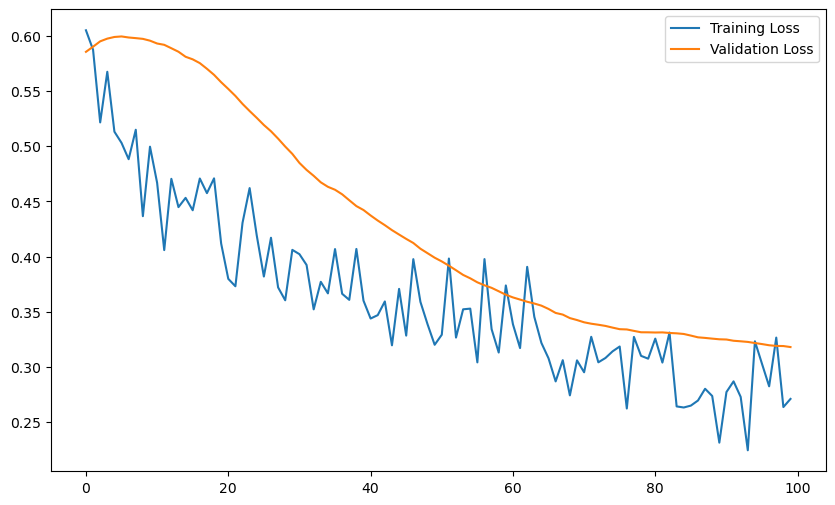

In [217]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()

In [218]:
pred = model.predict(X_test_scaled)

2/2 [==============================] - 0s 3ms/step


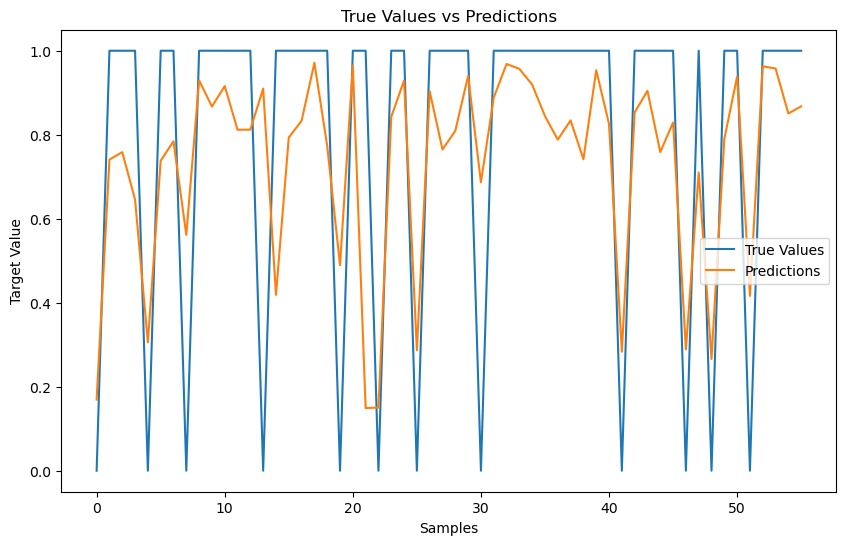

In [219]:
# Visualize the results
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='True Values')
plt.plot(pred, label='Predictions')
plt.legend()
plt.title("True Values vs Predictions")
plt.xlabel("Samples")
plt.ylabel("Target Value")
plt.show()

* The predicted values are approximately similar to the true values

In [205]:
# saving the model

model.save('lung_cancer_model.h5')

In [206]:
model